<a href="https://colab.research.google.com/github/ikld22/API/blob/master/FirstMLpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
clos = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

df = pd.read_csv("magic04.data", names = clos)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()
#to find the unique vluae

array([1, 0])

In [ ]:
#convert the class vluae from String to int
df["class"] =(df["class"] =="g").astype(int)

In [ ]:
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


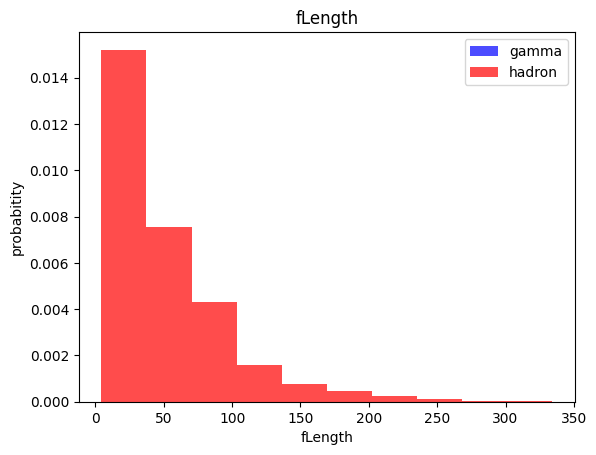

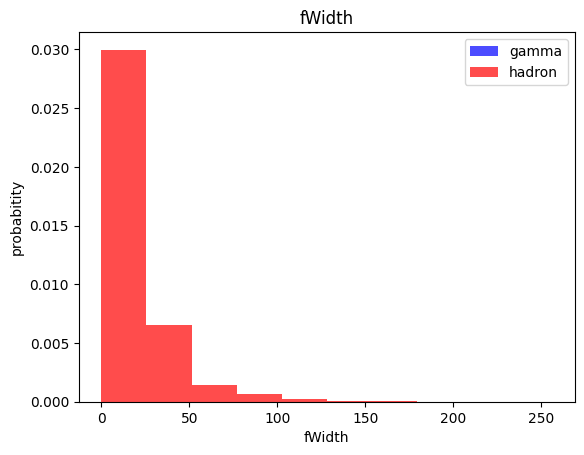

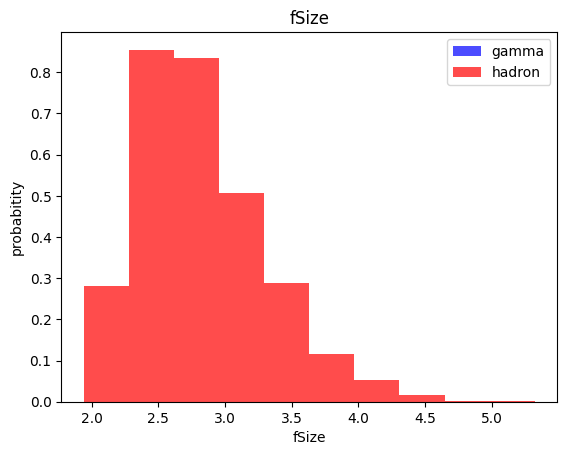

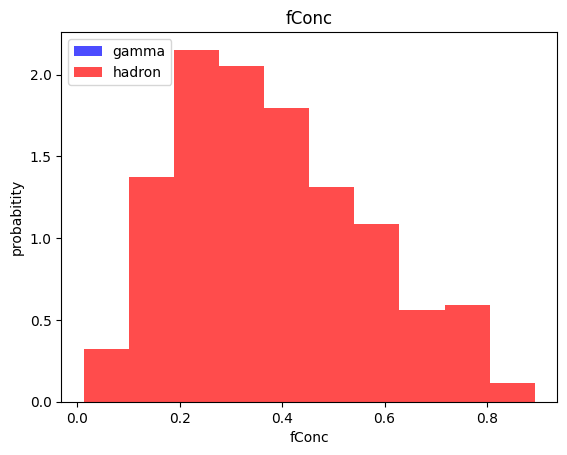

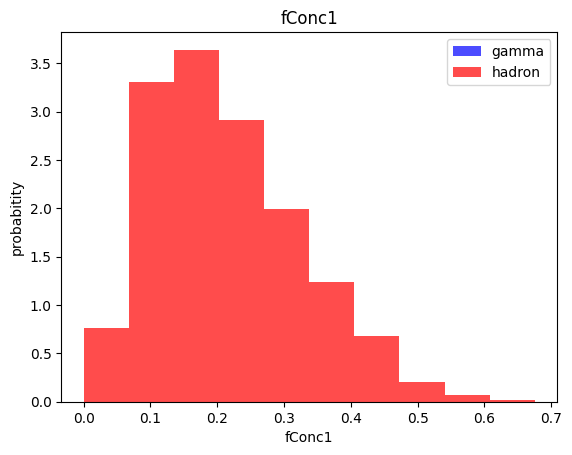

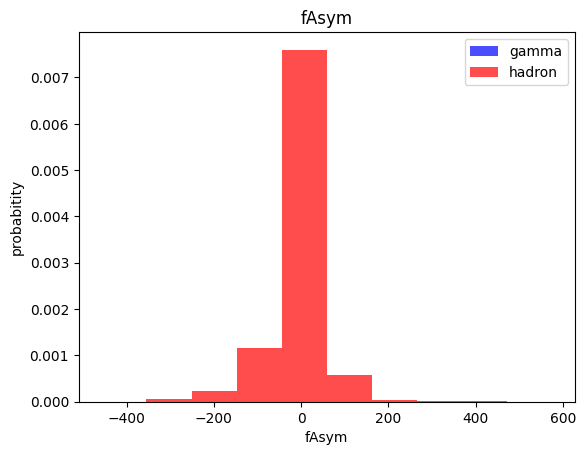

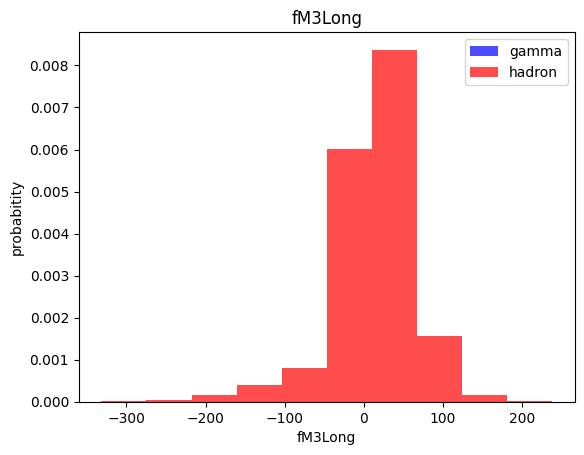

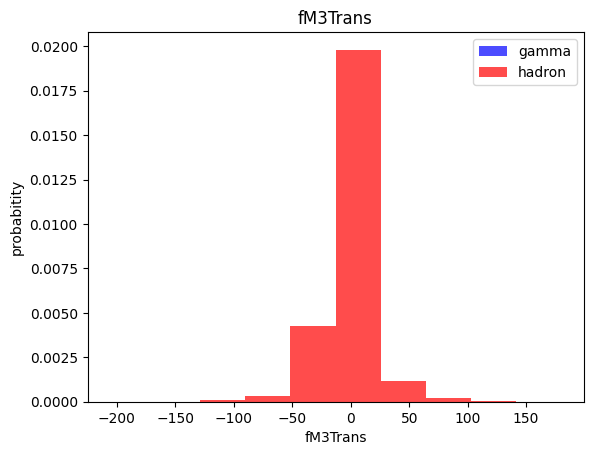

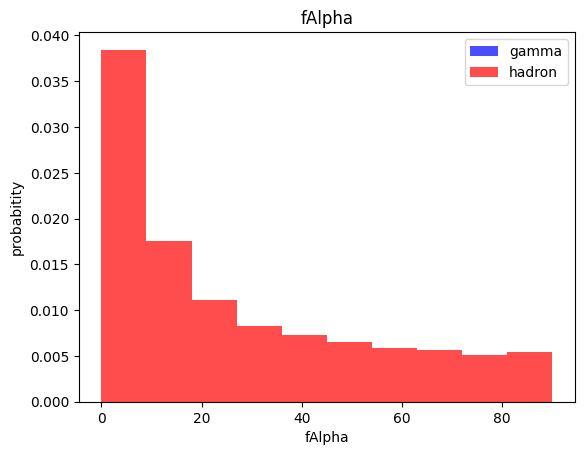

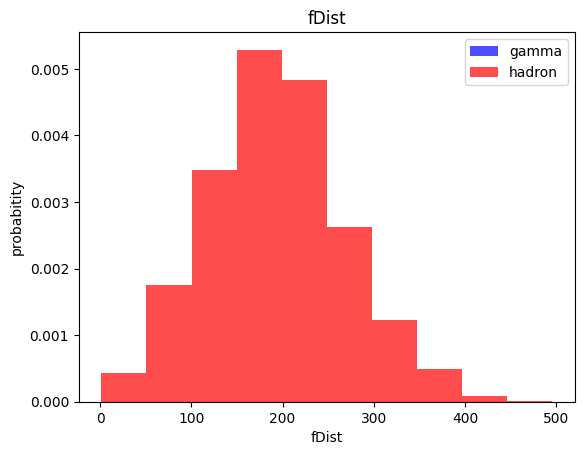

In [ ]:
for label in clos[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("probabitity")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    #histograms if the data is gmama or hadron

Tarin, validattion, test datasets

In [ ]:
train, valid, test =np.split(df.sample(frac=1),[int(0.6 * len(df)), int(0.8
 *len(df))])
#here we split data into somell groub

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  X = scalar.fit_transform(X)

  if oversample:
   ros =RandomOverSampler()
   X, y = ros.fit_resample(X, y)
  #لموزنة بيانات الصح والغلط
  data = np.hstack((X,np.reshape(y, (-1, 1 ))))

  return data,X,y


In [ ]:
#print(len(train[train["class"]==1])) # is gamma
#print(len(train[train["class"]==0])) # is hordan
#after we over samle we can see the how many vlaus

#here the we print the train we can see the true != to flass and we should fixet

7413

In [ ]:
train,X_train, y_train = scale_dataset(train, oversample=True)
valid,X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test   = scale_dataset(test, oversample=False)

implmant KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)#if we want change the precision-recall- f1-scor we change the n_neighbors
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred =knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1304
           1       0.87      0.86      0.86      2500

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

